In [21]:
#importing neccessary packages: Pandas, Numpy, Matplotlib, Scikit Learn, Seaborn#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split



In [22]:
#loading file and getting a peek at the data #
# This file contains a dataset of 1400+ real and fake bills, including their measurements. We will try to predict the genuity of a bill given its measurements#
#Using a head of 10, we can get a better idea of the structure and range of values we can expect for each feature#

data = pd.read_csv("/Users/drewholland/Desktop/Python/Datasets/fake_bills.csv")
data.head(10)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
5,True,172.17,103.74,104.08,4.42,2.95,112.81
6,True,172.34,104.18,103.85,4.58,3.26,112.81
7,True,171.88,103.76,104.08,3.98,2.92,113.08
8,True,172.47,103.92,103.67,4.00,3.25,112.85
9,True,172.47,104.07,104.02,4.04,3.25,113.45


In [23]:
#overview of the data types#
#as we can see from the data types of this dataset, we have our output feature, and several input features. Since this is a logistic regression model, we are trying to assign a 1 (real) or 0 (fake) for each record (dollar bill)#
#the input features are all float64, since they are all decimal values, and not integers#

data1 = data.dropna(how='any', axis=0)
data.dtypes

is_genuine         bool
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object

In [24]:
#the describe function is useful to get some of the summary statistics of the datset. As we can see here, the count of each feature is 1463, since we have 1463 records.#
# Looking at the Max and Min compared to the 50% percentiles and mean can help us spot outliers before we even begin to visualize the data#

data1.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000
mean,171.959193,104.031333,103.921476,4.485967,3.153083,112.674757
std,0.305457,0.299605,0.324181,0.663813,0.231466,0.873222
min,171.040000,103.140000,102.910000,2.980000,2.270000,109.490000
25%,171.750000,103.825000,103.710000,4.015000,2.990000,112.020000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.960000
75%,172.170000,104.230000,104.150000,4.870000,3.315000,113.340000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.320000


In [25]:
#the info() function also provides the same information as the dtypes() function, but also includes the non-null count metric, which helps us understand how incomplete the dataset is. 
# #Since this dataset was cleaned prior to importing, we have 0 null records#

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1463 entries, 0 to 1462
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1463 non-null   bool   
 1   diagonal      1463 non-null   float64
 2   height_left   1463 non-null   float64
 3   height_right  1463 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1463 non-null   float64
 6   length        1463 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 70.1 KB


In [26]:
#understanding how the current dataset is split#
#this datset has 492 fake bills, and 971 real bills.#
#This will be important during the train test split to determine the split size needed.#

data1.groupby('is_genuine').size()

is_genuine
False    492
True     971
dtype: int64

<AxesSubplot: xlabel='is_genuine', ylabel='count'>

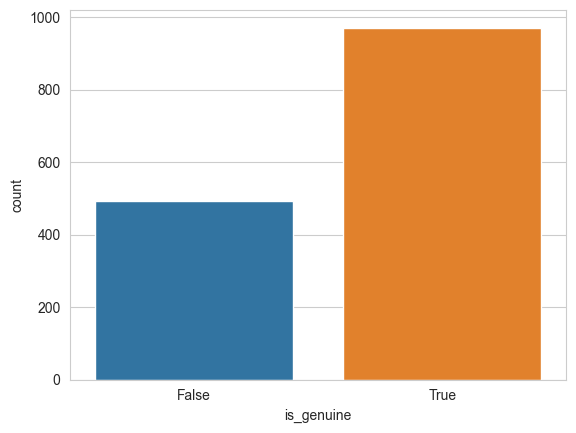

In [27]:
#visualizing the shape of the dataset#

sns.set_style('whitegrid')
sns.countplot(x='is_genuine',data=data1)

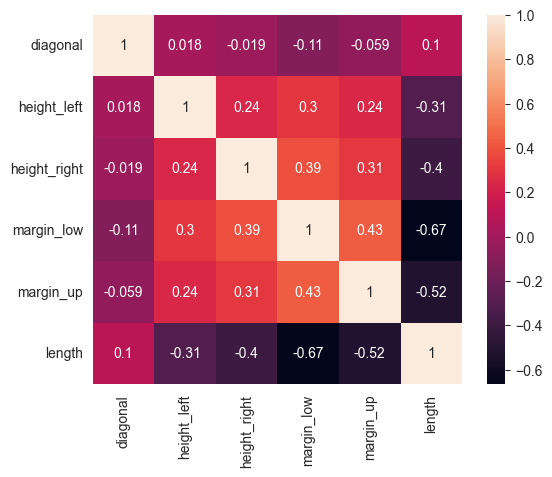

In [28]:
#generating a heatmap to visualize correlations between variables is crucial to prevent overfitting.# 
#Here, we create a new dataset by dropping the 'is_genuine' feature, since this is our target predictor.#
#After our first run of training our model, we can use this heatmap as guidance to drop features that are highly correlated.# 

data2 = data1.drop(['is_genuine'], axis=1)
corrmat = data2.corr()
sns.heatmap(corrmat, annot=True, square=True);

In [29]:
#import the train test split#
#This function from scikit learn helps use split our dataset in a training subset (the subset of data we will use to train our model), and the test subset (the subset of data we will use to test our model)

train, test = train_test_split(data1, test_size = 0.4, stratify= data['is_genuine'], random_state=42)

In [30]:
#understanding how the training dataset is split#

train.groupby('is_genuine').size()

is_genuine
False    295
True     582
dtype: int64

<AxesSubplot: xlabel='is_genuine', ylabel='count'>

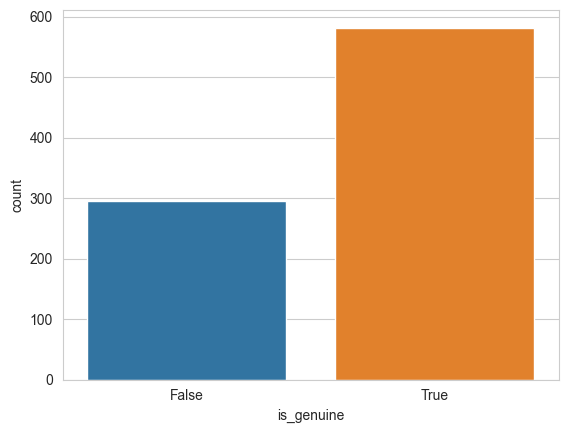

In [31]:
#Notice that this bar graph has the same initial appearance as the bar graph earlier in this notebook. #
# This is a good indication that we our training data subset effectively captures the profile of the dataset#

sns.set_style('whitegrid')
sns.countplot(x='is_genuine',data=train)

In [32]:
#understanding how the test dataset is split#

test.groupby('is_genuine').size()

is_genuine
False    197
True     389
dtype: int64

<AxesSubplot: xlabel='is_genuine', ylabel='count'>

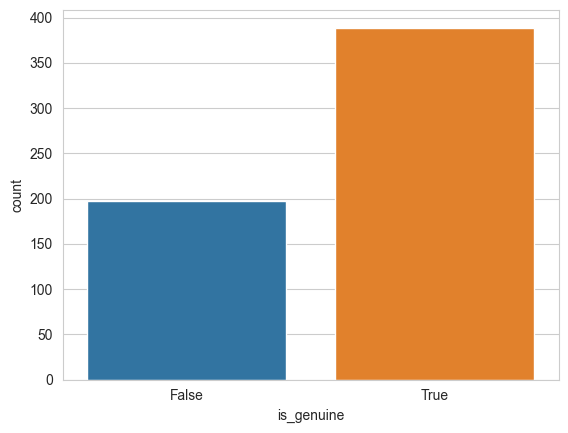

In [33]:
#The same here, this test subset appears to capture the profile of our dataset.#

sns.set_style('whitegrid')
sns.countplot(x='is_genuine',data=test)

In [34]:
#deciding which inputs/features to use for this model#
#To make an educated decision on which features to include, we can use the variables that we personally believe determine if a bill is fake or not, or we can run different versions of the model to see which is the most accurate.#

X_train = train[['diagonal','margin_low','margin_up','length']]
y_train = train.is_genuine
X_test = test[['diagonal','margin_low','margin_up','length']]
y_test = test.is_genuine

In [35]:
#peek at the training data#

X_train.head()

,diagonal,margin_low,margin_up,length
1353,171.05,4.72,3.10,112.44
673,172.22,3.69,3.17,113.14
39,172.28,3.93,3.08,113.51
1126,172.09,5.53,3.51,112.20
700,172.43,3.99,3.08,112.66


In [36]:
##Fitting the model##

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [37]:
##overall model accuracy is 98.46%. This means that the model accurately classified 98.46% of bills/records it tested.##

prediction = model.predict(X_test)
print('Accuracy:', metrics.accuracy_score(prediction,y_test))

Accuracy: 0.984641638225256


<AxesSubplot: >

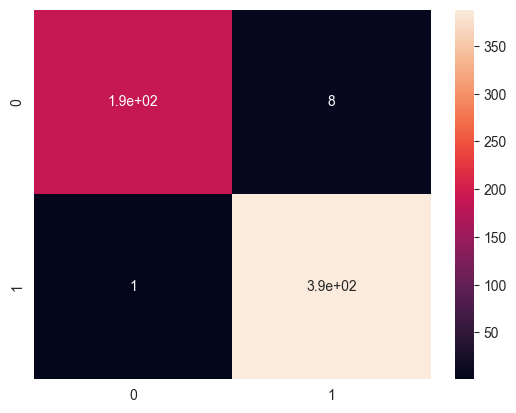

In [38]:
# Here, we are importing a confusion matrix. This matrix plots the actual values against the predicted values.#
# For example, the bottom left box has a value of one, meaning that we had 1 bill that was fake, but the model classified as real.#
# The top right box has a value of 8, meaning the model incorrectly classified 8 bills as fake, when they were real.#

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction)
sns.heatmap(cm, annot=True)

In [39]:
# In the final part of this workbook, we have the model classification report. We again see that the model accuracy is 98%, but we also get to see useful metrics such as the f-score, recall, and support numbers. #

from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

       False       0.99      0.96      0.98       197
        True       0.98      1.00      0.99       389

    accuracy                           0.98       586
   macro avg       0.99      0.98      0.98       586
weighted avg       0.98      0.98      0.98       586

